In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
from collections import defaultdict
import xml.etree.ElementTree as ET
import scipy.stats as stats
import sys 
sys.path.append('..')
from plotting import * 

Initializing plotting package


In [2]:
def count_markers_in_xml(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Dictionary to store the count of markers for each marker type
    marker_counts = defaultdict(int)

    # Locate Marker_Type elements
    marker_data = root.find("Marker_Data")
    if marker_data is not None:
        for marker_type in marker_data.findall("Marker_Type"):
            # Extract the name of the marker type
            type_name = marker_type.find("Name").text
            # Check that the marker name doesn't contain the keyword "Type" 
            if "Type" in type_name: 
                continue
            # Count the number of Marker elements within the Marker_Type
            markers = marker_type.findall("Marker")
            marker_counts[type_name] += len(markers)

    return dict(marker_counts)

## T79 Exonic/Intergenic

In [3]:
input_path = os.path.join('2024-11-08', 'G P14 Antennae T79-intergenic-b2-647 T79-exonic-b2-594 DAPI') 

# Load XML cell counting files 
xml_files = [f for f in os.listdir(input_path) if f.endswith('.xml')]

# load data 
data = []
for file in xml_files:
    file_path = os.path.join(input_path, file)
    marker_counts = count_markers_in_xml(file_path)
    data.append(marker_counts)

# Create a DataFrame from the data
data = pd.DataFrame(data)

data

,647P-594P,647A-594P
0,288,1
1,307,2
2,308,2
3,282,3
4,302,6


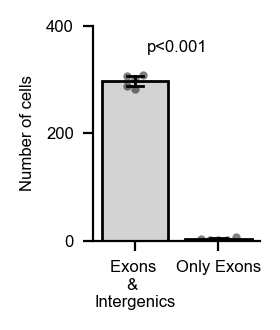

In [5]:
# Plot bar plot and do paired t-test
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
f, ax = plt.subplots(1, 1, figsize=(1.5, 1.75), dpi=200)
sns.barplot(data=data, palette=['lightgrey', 'darkgrey'], alpha=1, saturation=1, capsize=0.2, err_kws={'color': 'black', 'linewidth': 1}, linewidth=1, edgecolor='black')
sns.swarmplot(data=data, color='black', alpha=0.5, s=3)
plt.ylabel("Number of cells", fontsize=6)
plt.yticks(fontsize=6)
plt.xticks([0, 1], ["Exons \n& \nIntergenics", "Only Exons"], fontsize=6)
#plt.title(f"T79 Cell Counts \nP14 Antenna (n={data.shape[0]})", fontsize=6)
plt.ylim(0, 400)
t, p = stats.ttest_rel(data.iloc[:,0], data.iloc[:,1])
p_value_str = f"p={p:.3f}" if p >= 0.001 else "p<0.001"
plt.text(0.5, 0.9, p_value_str, ha='center', va='center', transform=ax.transAxes, fontsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(f"../figures/t79-cell-counts.pdf", format="pdf", pad_inches=0, bbox_inches=0, transparent=False)
plt.show()

In [5]:
# mean of the sum of both columns 
data.sum(axis=1)

0    289
1    309
2    310
3    285
4    308
dtype: int64

In [6]:
np.std(data.iloc[:,0])

10.49952379872535

In [7]:
print(f"range: {np.min(data.iloc[:,0])} - {np.max(data.iloc[:,0])}")

range: 282 - 308


In [8]:
data['proportion'] = data.iloc[:,0] / data.sum(axis=1)
data['proportion'].mean()

0.9907217704609879

In [9]:
data.iloc[:,:2].values

array([[288,   1],
       [307,   2],
       [308,   2],
       [282,   3],
       [302,   6]])

In [25]:
np.sum(data.iloc[:,0]) / np.sum(data.iloc[:,:2].values)

0.9906728847435043

In [26]:
data.sum(axis=1) / (data.sum(axis=1).sum() / 2)

0    0.385133
1    0.411691
2    0.413019
3    0.379812
4    0.410345
dtype: float64